In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [32]:
%matplotlib inline

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('census02.csv')

In [4]:
data.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Kaur Drive,Douglas,Adams,77.0,Head,Widowed,Male,Retired Museum education officer,NaN,Christian
1,2,Kaur Drive,Hollie,West,79.0,Head,Single,Female,Retired Dealer,NaN,Christian
2,3,Kaur Drive,Joseph,Hall,55.0,Head,Single,Male,Fast food restaurant manager,NaN,Christian
3,4,Kaur Drive,Gregory,Cox,35.0,Head,Single,Male,Housing manager/officer,NaN,NaN
4,5,Kaur Drive,Lydia,Jones,42.0,Head,Single,Female,Unemployed,NaN,Catholic


In [5]:
# for people with missing values in the 'Marital Status' column, we will fill the missing values with 'Underage' for people under 18

data.loc[(data['Marital Status'].isnull()) & (data['Age'] < 18), 'Marital Status'] = 'Underage'

In [ ]:
# !pip install ydata_profiling

In [7]:
profile = ProfileReport(data, title="Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
data['Marital Status'].isnull().sum()

0

In [9]:
data.isnull().sum()

House Number                         0
Street                               0
First Name                           0
Surname                              0
Age                                  0
Relationship to Head of House      762
Marital Status                       0
Gender                               0
Occupation                           0
Infirmity                        10034
Religion                          5995
dtype: int64

In [21]:
data.loc[(data['Religion'].isnull()) & (data['Age'] < 18), 'Religion'] = 'Underage/Undecided'

In [14]:
# replace 'Catholic' and 'Methodist' with 'Christian' in the 'Religion' column
data['Religion'] = data['Religion'].replace(['Catholic', 'Methodist'], 'Christian')

# get unique values in the 'Religion' column excluding missing values
religions = data['Religion'].value_counts().index.tolist()

# print the unique values
print(religions)

['Christian', 'Underage/Undecided', 'Muslim', 'Sikh', 'Jewish', 'Agnostic', ' ', 'Pagan', 'Bahai', 'Undecided', 'Sith', 'Nope', 'Jedi']


In [12]:
unique_marital = data['Marital Status'].dropna().unique()

print(unique_marital)

['Widowed' 'Single' 'Underage' 'Married' 'Divorced' ' ']


In [13]:
# Adjusting cleaning strategy based on the new information:

# Filling missing values in 'Relationship to Head of House' with "Unknown"
data['Relationship to Head of House'].fillna('Unknown', inplace=True)

# Assuming missing values in 'Infirmity' indicate "None" or "No infirmity", filling with "None"
data['Infirmity'].fillna('None', inplace=True)

# Re-check for missing values to confirm changes.
missing_values_final_check = data.isnull().sum()

missing_values_final_check

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                      0
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         3510
dtype: int64

In [23]:
data.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [22]:
data['Religion'].fillna('Unknown', inplace=True)

In [24]:
print(data.dtypes)

House Number                       int64
Street                            object
First Name                        object
Surname                           object
Age                              float64
Relationship to Head of House     object
Marital Status                    object
Gender                            object
Occupation                        object
Infirmity                         object
Religion                          object
dtype: object


In [26]:
data.describe()

,House Number,Age
count,10118.000000,10118.000000
mean,44.312908,35.163123
std,48.718713,21.382406
min,1.000000,0.000000
25%,11.000000,18.000000
50%,25.000000,34.000000
75%,56.000000,50.000000
max,208.000000,120.000000


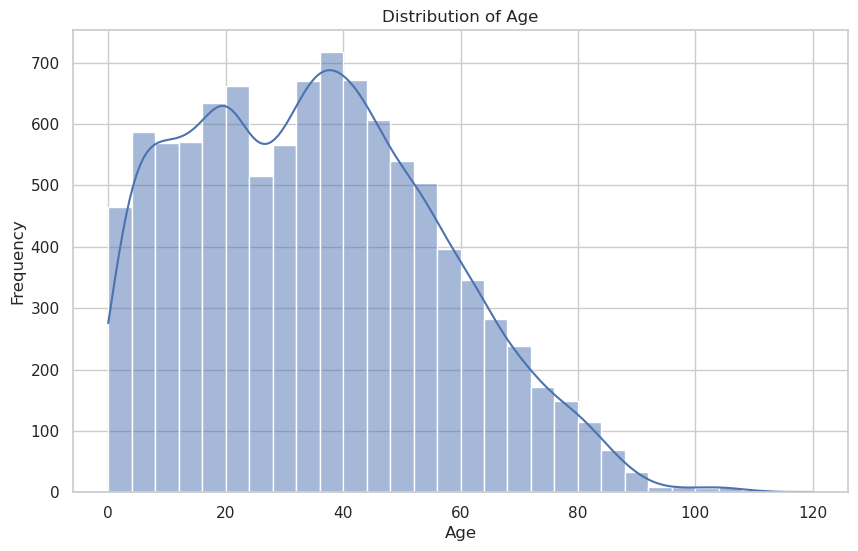

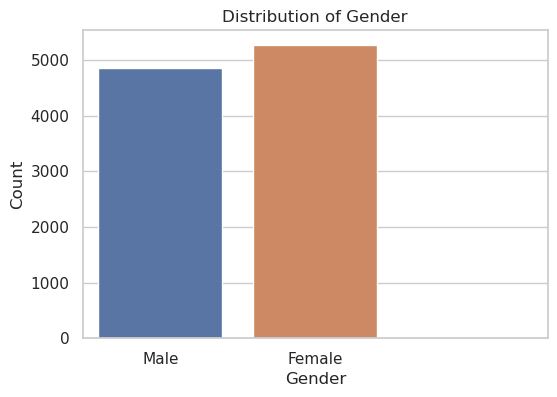

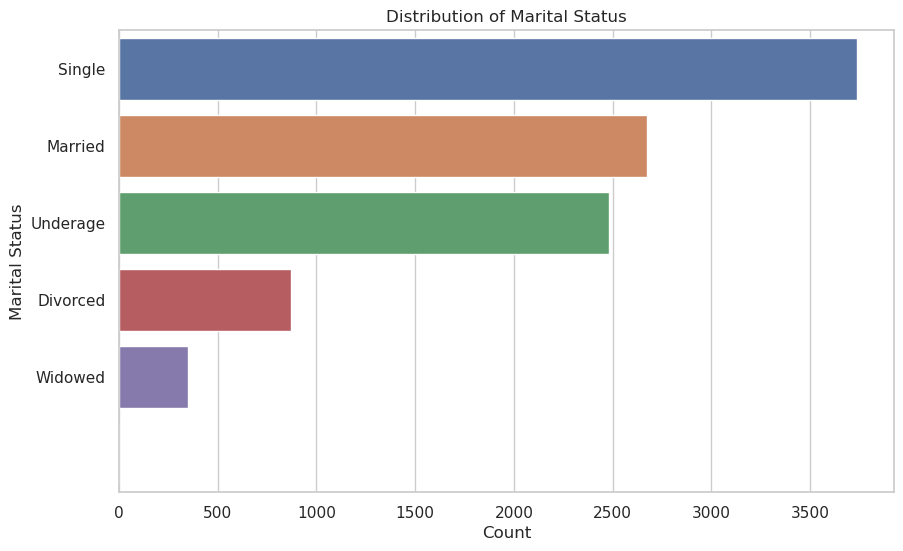

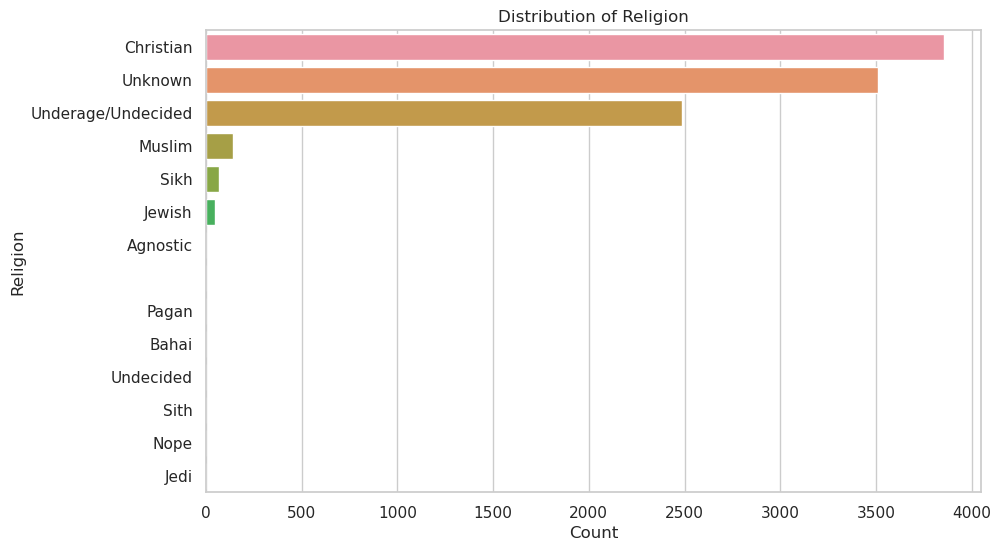

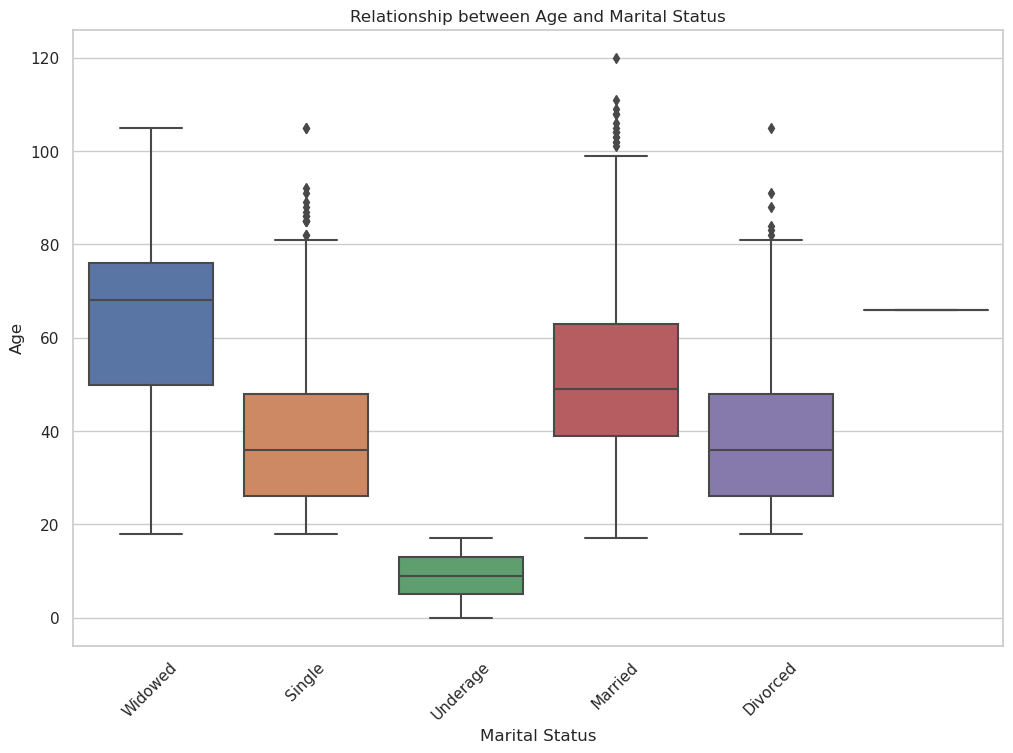

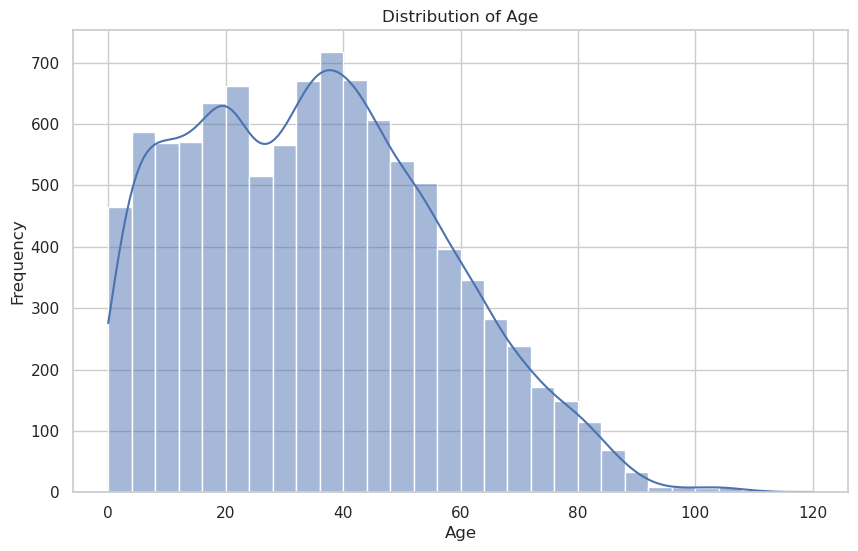

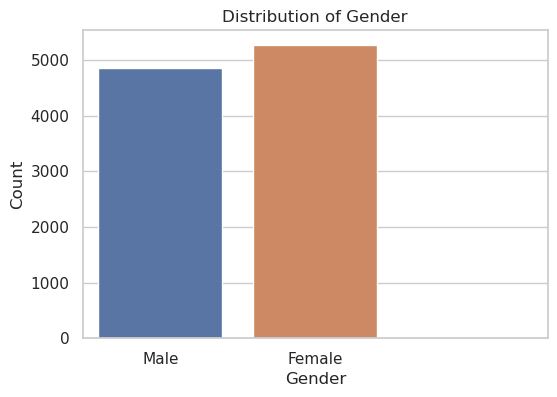

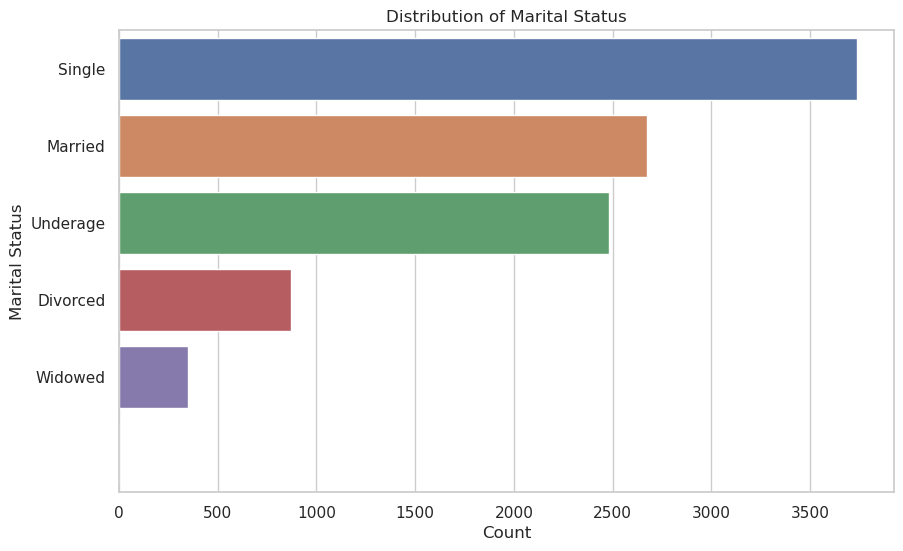

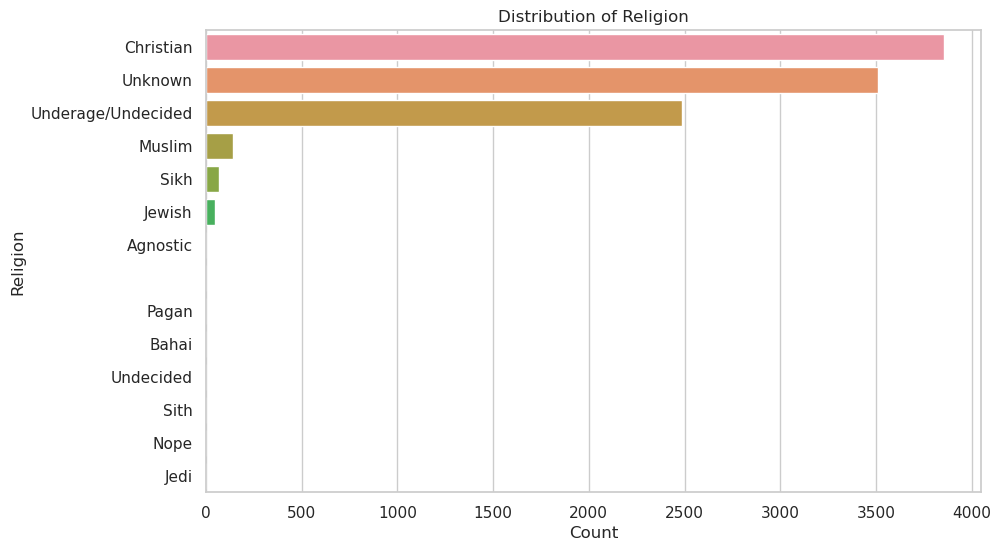

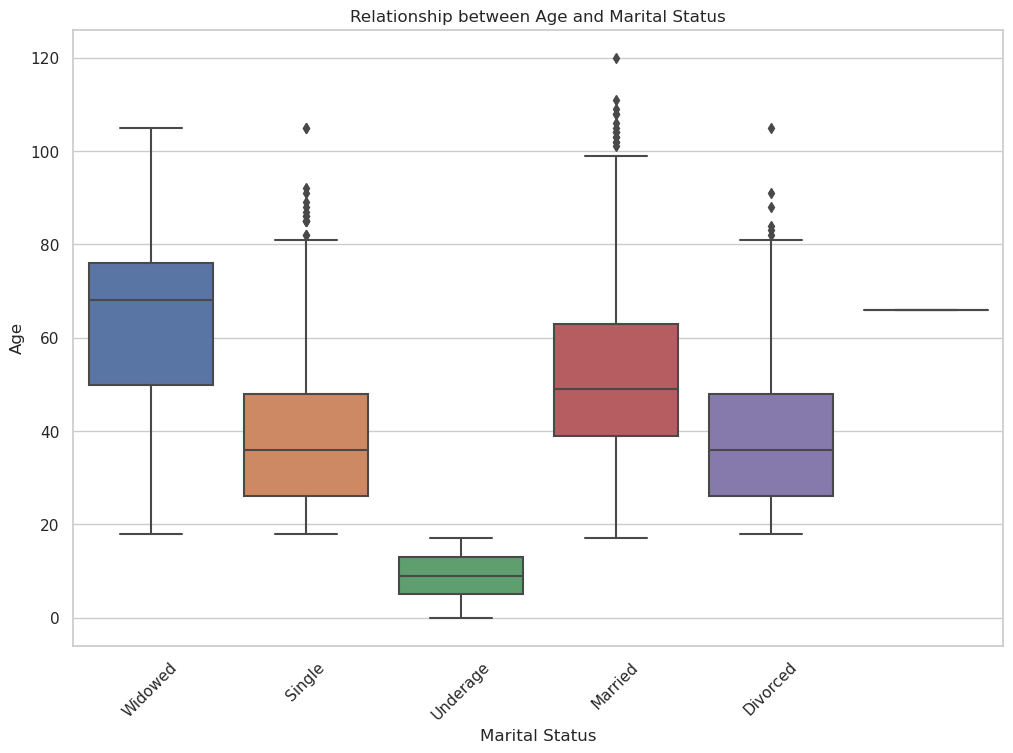

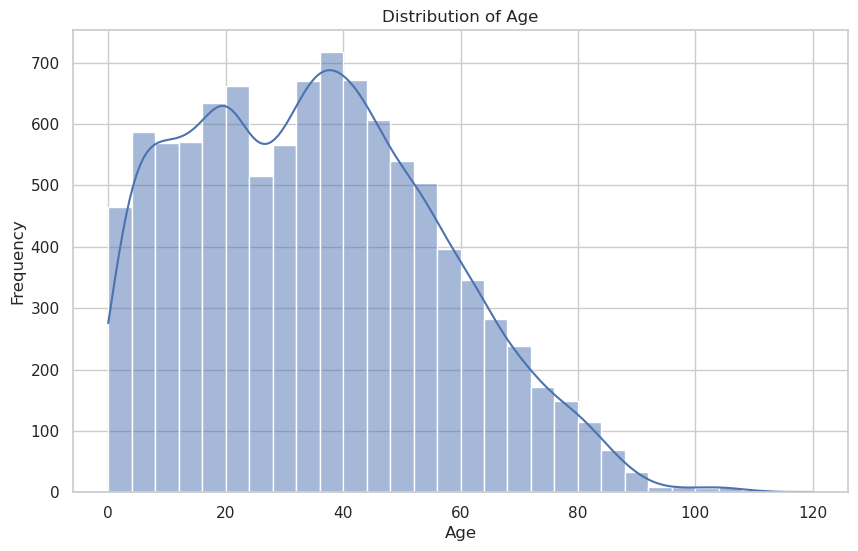

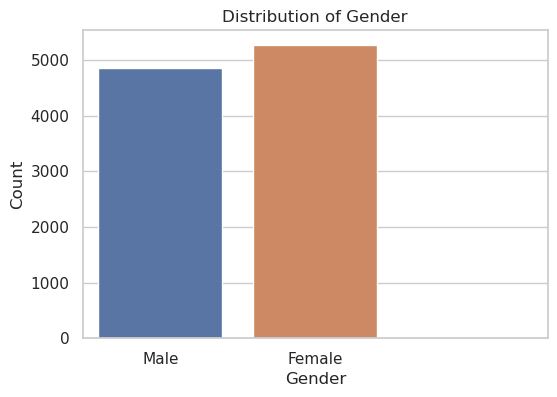

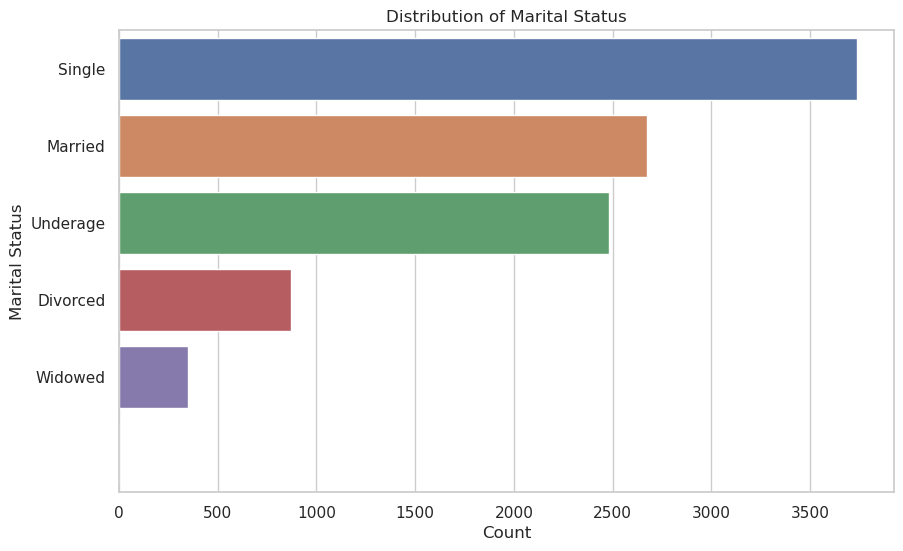

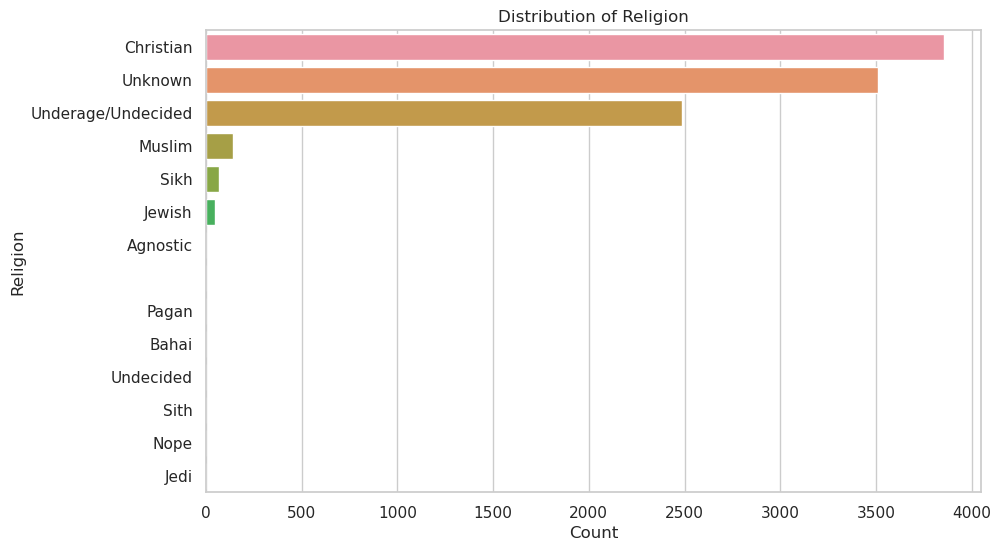

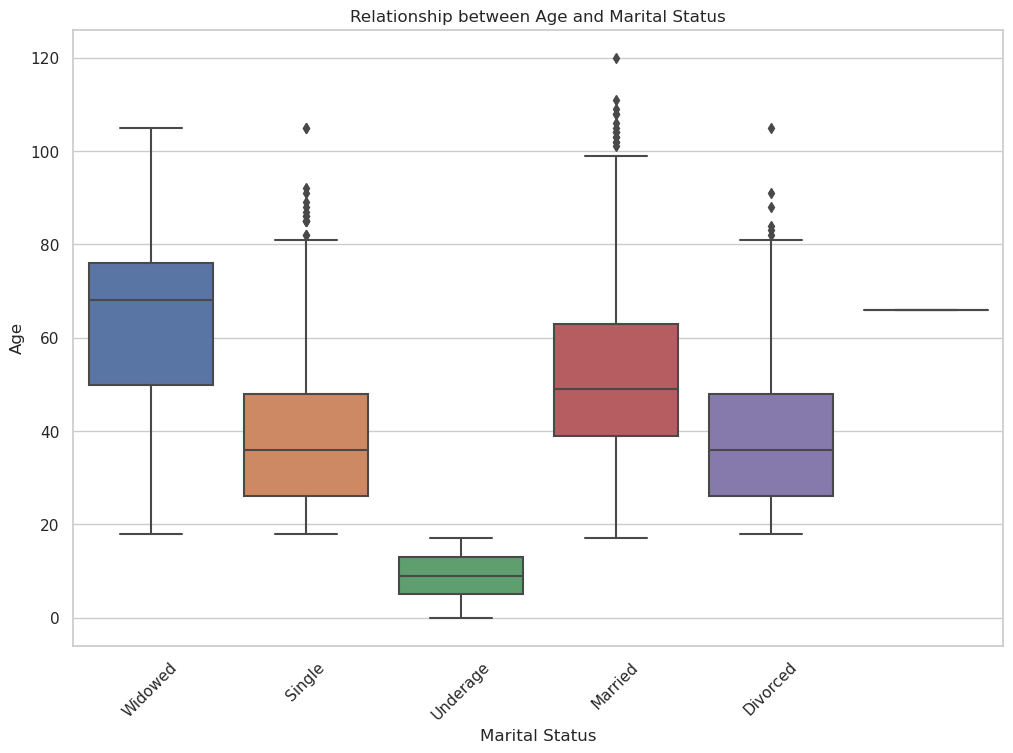

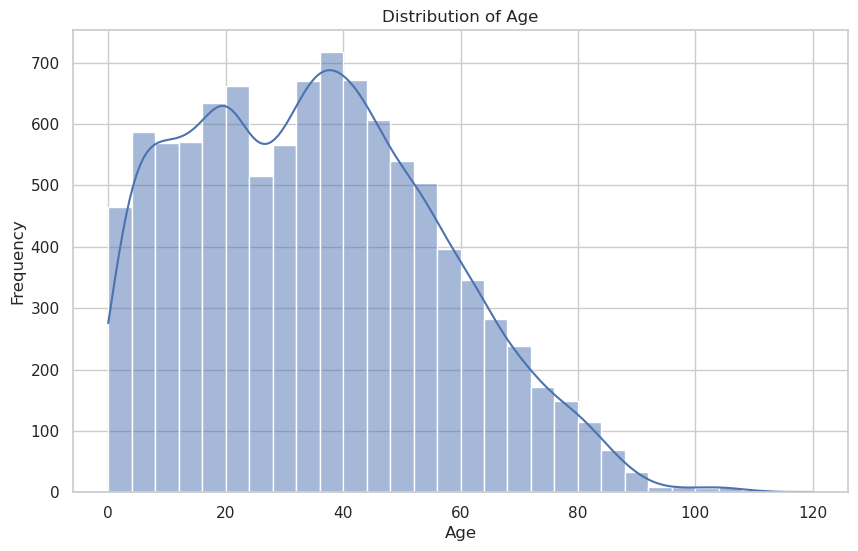

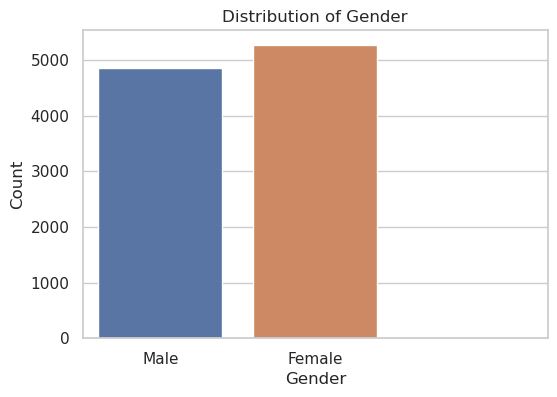

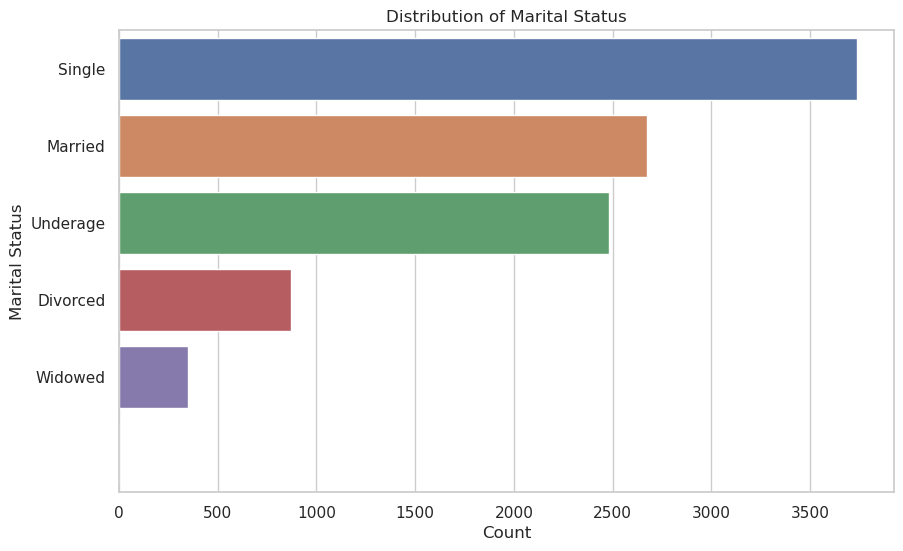

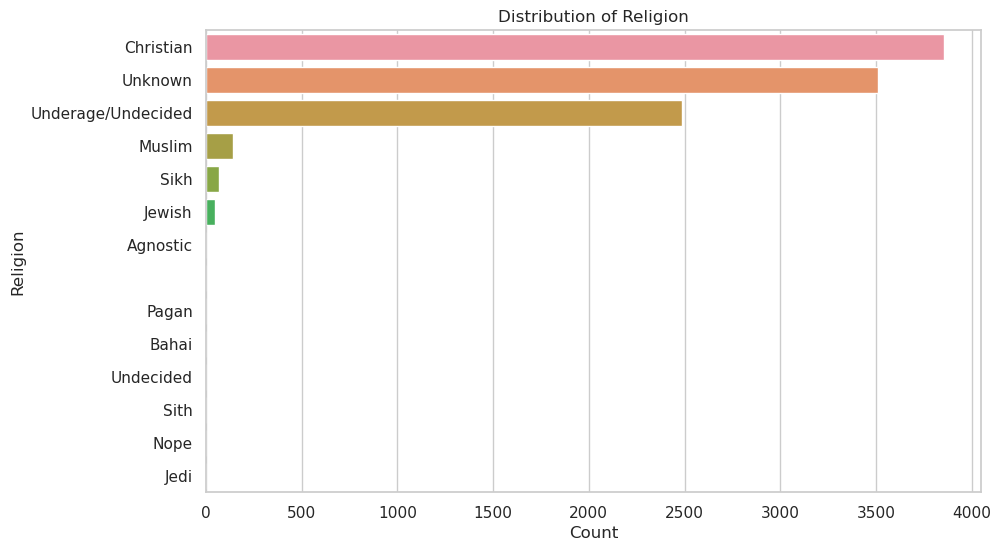

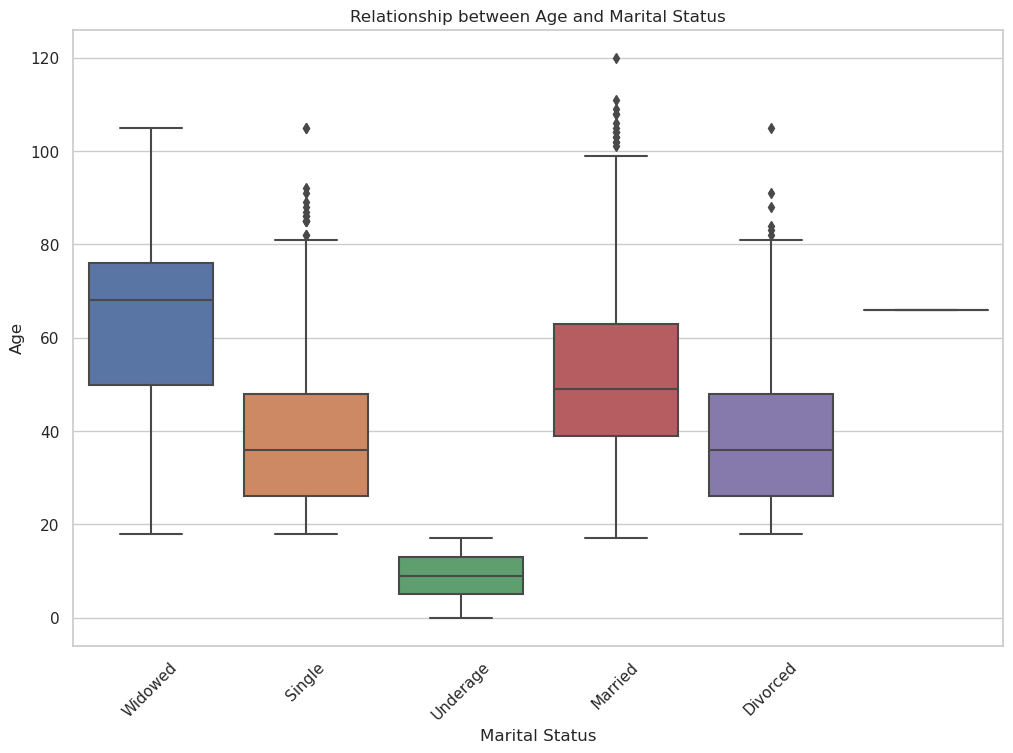

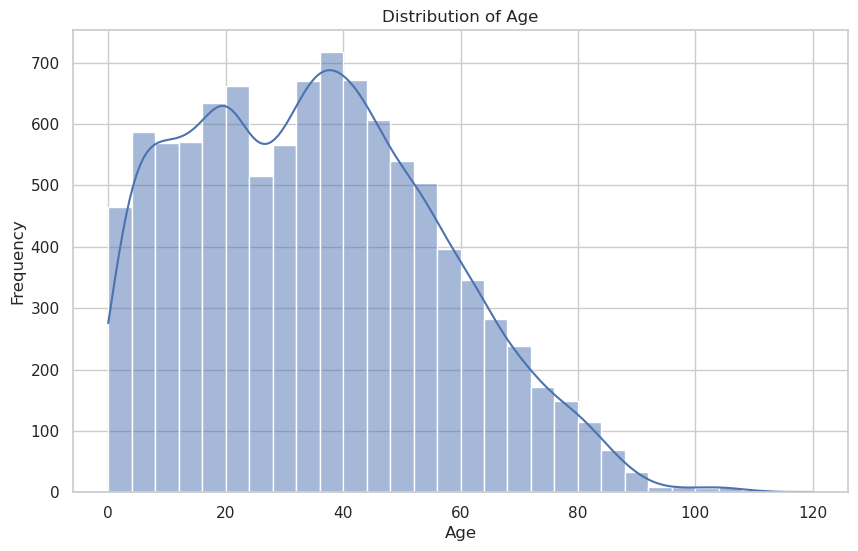

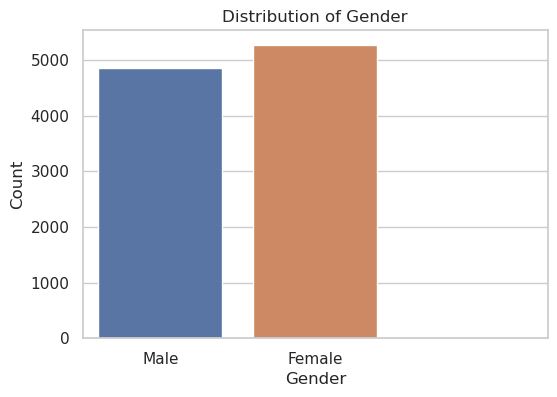

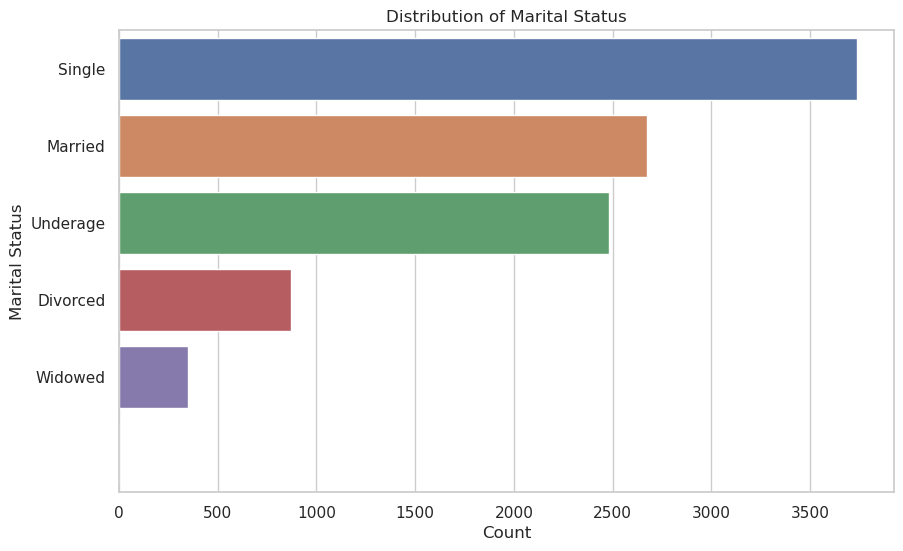

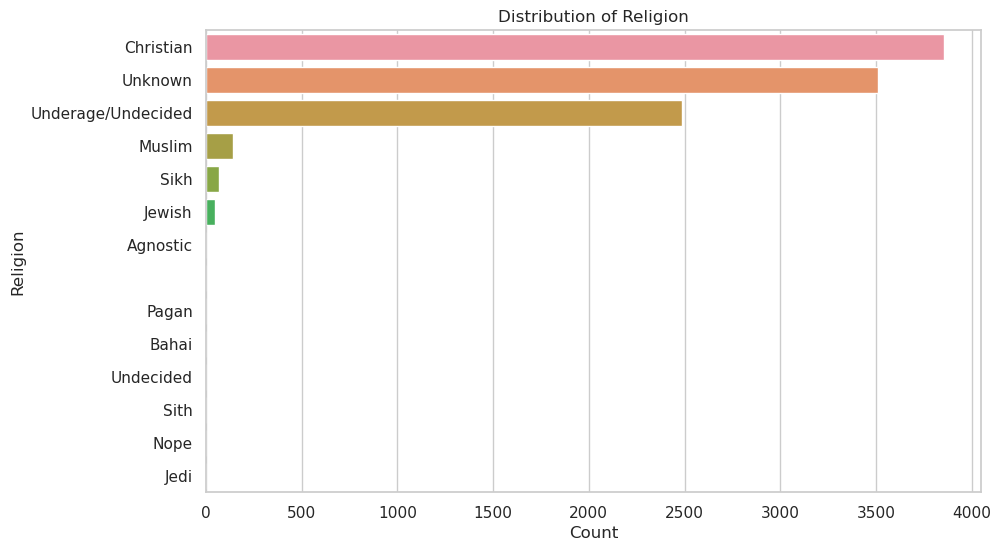

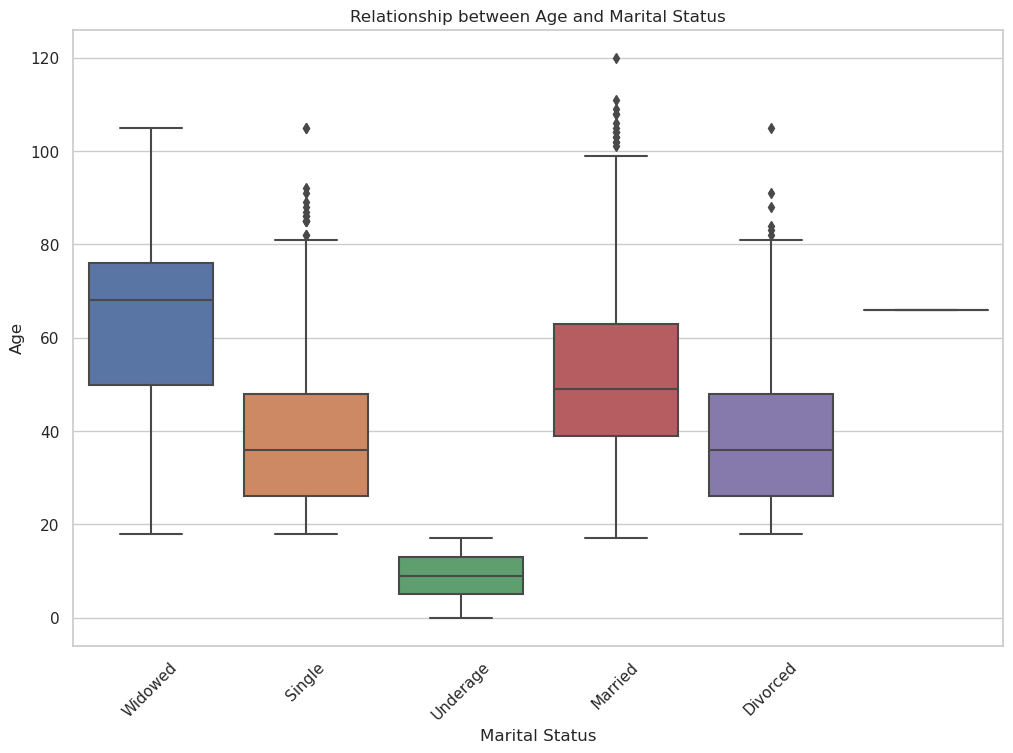

In [33]:
# To perform relevant Exploratory Data Analysis (EDA) on the dataset, we'll focus on:
# 1. Distribution of key numerical variables (e.g., Age)
# 2. Distribution of key categorical variables (e.g., Gender, Marital Status, Religion)
# 3. Relationships between key variables (e.g., Age vs. Marital Status)

# Setting up visual style
sns.set(style="whitegrid")

# EDA 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# EDA 2: Distribution of Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# EDA 3: Distribution of Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(y='Marital Status', data=data, order = data['Marital Status'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.show()

# EDA 4: Distribution of Religion
plt.figure(figsize=(10, 6))
sns.countplot(y='Religion', data=data, order = data['Religion'].value_counts().index)
plt.title('Distribution of Religion')
plt.xlabel('Count')
plt.ylabel('Religion')
plt.show()

# EDA 5: Relationship between Age and Marital Status (via boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Marital Status', y='Age', data=data)
plt.title('Relationship between Age and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


In [37]:
# creating a function that categorizes employment status based on occupation and age

def employment_status(row):
    age = row['Age']
    occupation = row['Occupation']
    if age < 16:
        return 'Underage'
    elif (age >= 16 and age <= 22) and (occupation == 'Student' or occupation == 'University Student'):
        return 'Student'
    elif 'retired' in occupation.lower():
        return 'Retired'
    elif 'unemployed' in occupation.lower():
        return 'Unemployed'
    else:
        return 'Employed'
    
# Applying the function to the dataset to create a new column 'Employment Status'
data['Employment Status'] = data.apply(employment_status, axis=1)

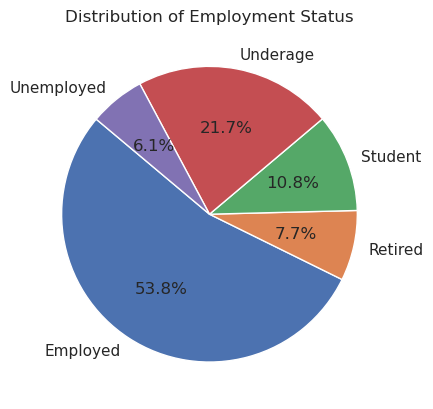

In [38]:
# Group the 'Employment Status' column by count
employment_status = data.groupby('Employment Status').size()

# Create a pie chart to visualize the distribution of employment status
plt.pie(employment_status, labels=employment_status.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employment Status')

plt.show()

In [39]:
# now we create a new column for household occupancy

household_occupancy = data.groupby(['House Number', 'Street'])['Surname'].nunique().reset_index()
household_occupancy.columns = ['House Number', 'Street', 'Occupants']
household_occupancy.describe()

,House Number,Occupants
count,3158.000000,3158.000000
mean,34.837239,1.649778
std,39.681175,1.535624
min,1.000000,1.000000
25%,9.000000,1.000000
50%,21.000000,1.000000
75%,42.000000,2.000000
max,208.000000,20.000000


In [42]:
# calculating household occupancy and average age for all homes
household_occupancy = data.groupby(['House Number', 'Street'])['Surname'].nunique().reset_index()
household_occupancy.columns = ['House Number', 'Street', 'Household Occupancy']
all_homes = household_occupancy
avg_age = data.groupby(['House Number', 'Street'])['Age'].mean().reset_index()
avg_age.columns = ['House Number', 'Street', 'Average Age']

# now we merge the two dataframes to create a summary
summary = pd.merge(all_homes, avg_age, on=['House Number', 'Street'])
# print(summary)
summary.describe()

,House Number,Household Occupancy,Average Age
count,3158.000000,3158.000000,3158.000000
mean,34.837239,1.649778,40.067340
std,39.681175,1.535624,18.871876
min,1.000000,1.000000,8.600000
25%,9.000000,1.000000,26.000000
50%,21.000000,1.000000,35.291667
75%,42.000000,2.000000,50.000000
max,208.000000,20.000000,106.000000


In [43]:
# Creating a crosstab between religion and marital status
crosstab = pd.crosstab(data['Religion'], data  ['Marital Status'])
print(crosstab)
# Creating a crosstab between infirmity and marital status
crosstab = pd.crosstab(data['Infirmity'], data ['Marital Status'])
print(crosstab)

Marital Status         Divorced  Married  Single  Underage  Widowed
Religion                                                           
                    0         0        0       2         0        0
Agnostic            0         0        0       2         0        0
Bahai               0         0        0       0         0        1
Christian           1       465     1320    1849         0      221
Jedi                0         0        0       1         0        0
Jewish              0        12       15      17         0        3
Muslim              0        16       52      70         0        4
Nope                0         1        0       0         0        0
Pagan               0         0        0       1         0        0
Sikh                0         4       21      40         0        3
Sith                0         0        0       1         0        0
Undecided           0         0        0       1         0        0
Underage/Undecided  0         0        1       0

                         mean  median
Religion                             
                    33.500000    33.5
Agnostic            50.500000    50.5
Bahai               28.000000    28.0
Christian           46.506731    45.0
Jedi                53.000000    53.0
Jewish              43.957447    42.0
Muslim              38.105634    33.0
Nope                49.000000    49.0
Pagan               19.000000    19.0
Sikh                35.661765    31.0
Sith                29.000000    29.0
Undecided           31.000000    31.0
Underage/Undecided   8.808048     9.0
Unknown             41.106416    39.0


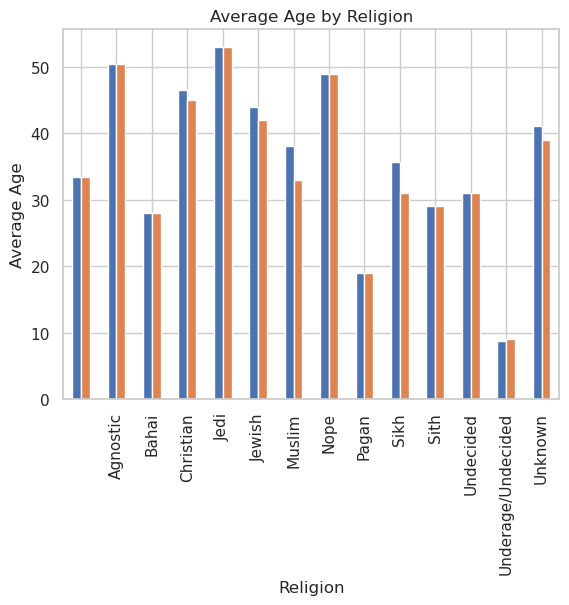

In [44]:
# Creating a pivot table to analyze the average age by religion
pivot_table = data.pivot_table(index='Religion', values='Age', aggfunc={'Age': ['median', 'mean']})
print(pivot_table)
# Creating a bar chart to visualize the average age by religion
pivot_table.plot(kind='bar', legend=None)
plt.xlabel('Religion')
plt.ylabel('Average Age')
plt.title('Average Age by Religion')
plt.show()

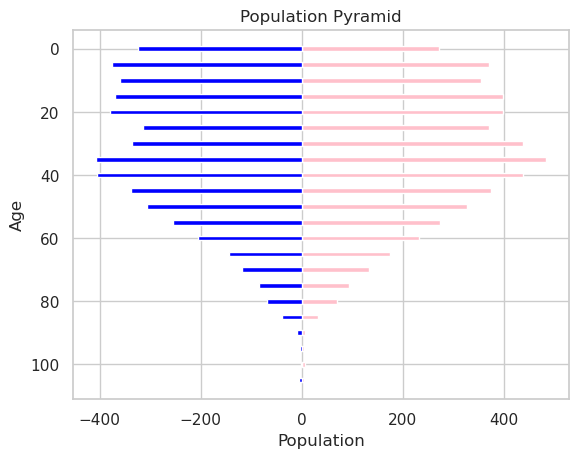

In [45]:
# Create a new column 'Age Band' using integer division to group ages into bands of 5
data['Age Band'] = (data['Age'] // 5) * 5
# Create separate dataframes for male and female population
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']
# Group data by age bands and count the number of males and females in each group
male_count = male_data.groupby('Age Band')['Age'].count().reset_index()
female_count = female_data.groupby('Age Band')['Age'].count().reset_index()
# Merge the two dataframes
merged_data = pd.merge(male_count, female_count, on='Age Band')
# Create a horizontal bar chart for the population pyramid
fig, ax = plt.subplots()
ax.barh(merged_data['Age Band'], merged_data['Age_y'], height=1.5, color='pink', label='Female')
ax.barh(merged_data['Age Band'], -merged_data['Age_x'], height=1.5, color='blue', label='Male')
# Add axis labels and title
ax.set_xlabel('Population')
ax.set_ylabel('Age')
ax.set_title('Population Pyramid')
# Invert the y-axis and show the plot
ax.invert_yaxis()
plt.show()

In [46]:
# to get a sense of what the employment situation looks like
print(data['Employment Status'].value_counts())

Employment Status
Employed      5446
Underage      2191
Student       1088
Retired        778
Unemployed     615
Name: count, dtype: int64
